Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

Objective: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.


Dataset: This lab utilizes the Amazon UK product dataset which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [3]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [78]:
df.nunique().sort_values(ascending=False)


uid                  2443651
asin                 2222742
title                2077591
price                  82916
reviews                19446
category                 296
stars                     42
boughtInLastMonth         25
isBestSeller               2
dtype: int64

Part 1: Analyzing Best-Seller Trends Across Product Categories
Objective: Understand the relationship between product categories and their best-seller status.

Crosstab Analysis:

Create a crosstab between the product category and the isBestSeller status.


In [20]:
# Criar a tabela cruzada
crosstab = pd.crosstab(df['category'], df['isBestSeller'])
# Adicionar a coluna Total
crosstab['Total'] = crosstab.sum(axis=1)

In [21]:
crosstab

isBestSeller,False,True,Total
category,,,
3D Printers,247,1,248
3D Printing & Scanning,4065,2,4067
Abrasive & Finishing Products,245,5,250
Action Cameras,1696,1,1697
Adapters,251,3,254
...,...,...,...
Wind Instruments,243,7,250
Window Treatments,234,5,239
Women,17559,213,17772


In [22]:
# Adicionar uma coluna para a proporção de best-sellers
crosstab['Proporção Best-Sellers'] = crosstab[True] / crosstab['Total']

# Ordenar as categorias pela proporção de best-sellers em ordem decrescente
crosstab_sorted = crosstab.sort_values(by='Proporção Best-Sellers', ascending=False)

# Exibir a tabela ordenada
crosstab_sorted


isBestSeller,False,True,Total,Proporção Best-Sellers
category,,,,
Grocery,9008,556,9564,0.058135
Smart Home Security & Lighting,98,6,104,0.057692
Health & Personal Care,9017,552,9569,0.057686
Mobile Phone Accessories,248,11,259,0.042471
Power & Hand Tools,8353,306,8659,0.035339
...,...,...,...,...
"CD, Disc & Tape Players",8798,0,8798,0.000000
General Music-Making Accessories,259,0,259,0.000000
Snowboard Boots,1449,0,1449,0.000000



Are there categories where being a best-seller is more prevalent?

**"Grocery", "Smart Home Security & Lighting" e "Health & Personal Care"**




Statistical Tests:

Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
Compute Cramér's V to understand the strength of association between best-seller status and category.


In [24]:
import scipy.stats as stats
import numpy as np
# Conduzir o teste qui-quadrado de independência
chi2, p, dof, expected = stats.chi2_contingency(crosstab)

print(f"Chi-squared: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
# print("Expected frequencies:")
# print(expected)

# Calcular o Cramér's V
n = crosstab.sum().sum()
cramers_v = np.sqrt((chi2 / n) / (min(crosstab.shape) - 1))
print(f"Cramér's V: {cramers_v}")


Chi-squared: 36684.384144034884
p-value: 0.0
Degrees of freedom: 885
Cramér's V: 0.050020188016717454




Visualizations:

Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [30]:
# Selecionar as 5 categorias com o maior número total de produtos
crosstab = crosstab.nlargest(5, 'Proporção Best-Sellers')

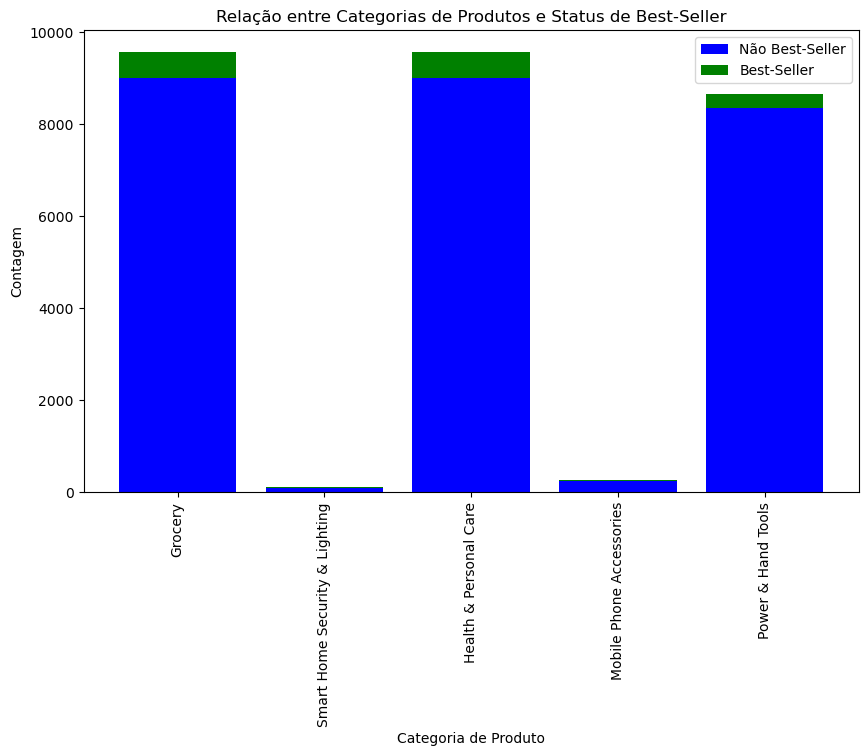

In [44]:
# Definir as cores
colors = ['blue', 'green']

# Criar a figura e os eixos
fig, ax = plt.subplots(figsize=(10, 6))

# Criar as barras empilhadas
bar1 = ax.bar(crosstab.index, crosstab[False], color=colors[0], label='Não Best-Seller')
bar2 = ax.bar(crosstab.index, crosstab[True], bottom=crosstab[False], color=colors[1], label='Best-Seller')

# Adicionar título e rótulos aos eixos
plt.title('Relação entre Categorias de Produtos e Status de Best-Seller')
plt.xlabel('Categoria de Produto')
plt.ylabel('Contagem')
plt.xticks(rotation=90)
# Adicionar legenda
plt.legend()

# Mostrar o gráfico
plt.show()

Part 2: Exploring Product Prices and Ratings Across Categories and Brands
Objective: Investigate how different product categories influence product prices.



Preliminary Step: Remove outliers in product prices.



In [45]:
def rm_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers


outliers_df = df['price']
outliers_df = rm_outliers(outliers_df)


10         139.00
19         164.99
25         149.99
28         289.00
31         199.99
            ...  
2443619    166.99
2443627    152.58
2443638    108.77
2443641    166.99
2443643    158.99
Name: price, Length: 327688, dtype: float64

In [81]:
display(outliers_df.index)

Index([     10,      19,      25,      28,      31,      33,      34,      35,
            36,      37,
       ...
       2443590, 2443591, 2443603, 2443613, 2443614, 2443619, 2443627, 2443638,
       2443641, 2443643],
      dtype='int64', length=327688)

In [82]:
df = df.drop(outliers_df.index)

```python
# Example usage:
data_series = df['ColumnName']  # replace 'ColumnName' with your specific column
outliers = tukeys_test_outliers(data_series)
print(outliers)
```



For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

Violin Plots:

Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
Which product category tends to have the highest median price? Don't filter here by top categories.
**Desktop PCs' price 74.00.**


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2115963 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 147.3+ MB


In [84]:
import seaborn as sns
# Contar o número de produtos por categoria
category_counts = df['category'].value_counts()

# Selecionar as 20 principais categorias
top_20_categories = category_counts.head(20).index


# # Filtrar o DataFrame para incluir apenas essas categorias
df_top_20 = df[df['category'].isin(top_20_categories)]


# Calcular a mediana dos preços para cada categoria
median_prices = df.groupby('category')['price'].median()

# Identificar a categoria com o maior preço mediano
highest_median_category = median_prices.idxmax()
highest_median_price = median_prices.max()

print(f"A categoria de produto com o maior preço mediano é '{highest_median_category}' com um preço mediano de {highest_median_price:.2f}.")


A categoria de produto com o maior preço mediano é 'Desktop PCs' com um preço mediano de 74.00.


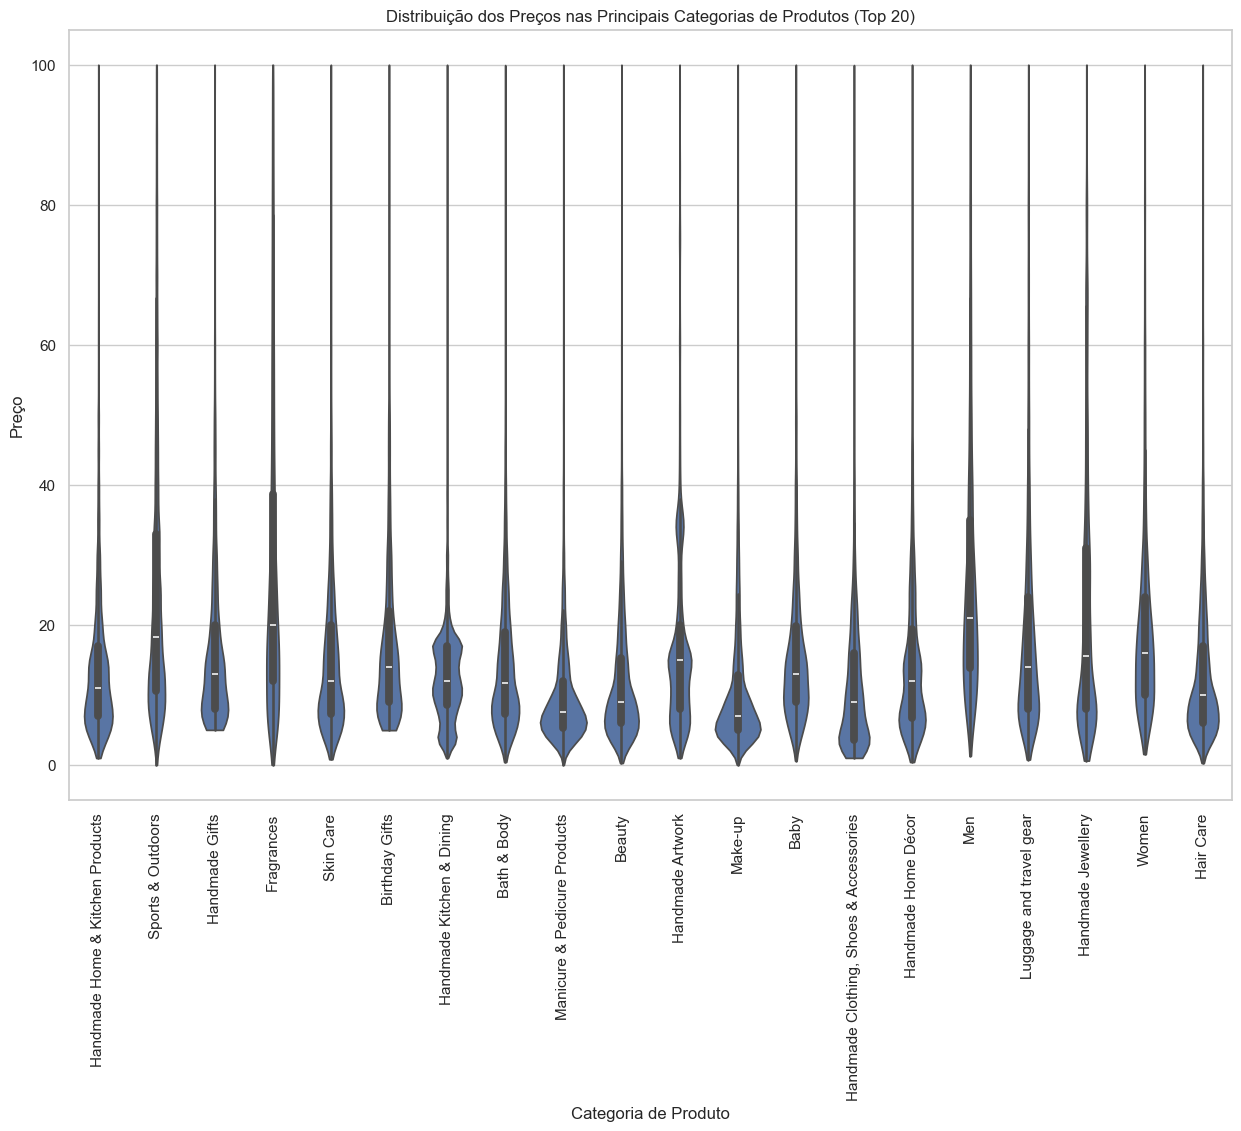

In [85]:
# # Configurar o estilo do Seaborn
sns.set_theme(style="whitegrid")

# Criar a figura
plt.figure(figsize=(15, 10))

# Criar o violin plot
sns.violinplot(x='category', y='price', data=df_top_20, cut=0)

# Adicionar título e rótulos aos eixos
plt.title('Distribuição dos Preços nas Principais Categorias de Produtos (Top 20)')
plt.xlabel('Categoria de Produto')
plt.ylabel('Preço')
plt.xticks(rotation=90)

# Mostrar o gráfico
plt.show()








Bar Charts:

Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
Which product category commands the highest average price? Don't filter here by top categories.

**'Motherboards' price 68.77**




In [86]:


# Selecionar as 10 principais categorias
top_10_categories = top_20_categories[:10]

# Filtrar o DataFrame para incluir apenas essas categorias
df_top_10 = df[df['category'].isin(top_10_categories)]

# Calcular o preço médio para cada categoria
average_prices = df_top_10.groupby('category')['price'].mean().sort_values(ascending=False)

# Calcular a média dos preços para cada categoria
mean_prices = df.groupby('category')['price'].mean()

# Identificar a categoria com o maior preço médio
highest_mean_category = mean_prices.idxmax()
highest_mean_price = mean_prices.max()

print(f"A categoria de produto com o maior preço médio é '{highest_mean_category}' com um preço médio de {highest_mean_price:.2f}.")


A categoria de produto com o maior preço médio é 'Motherboards' com um preço médio de 68.77.


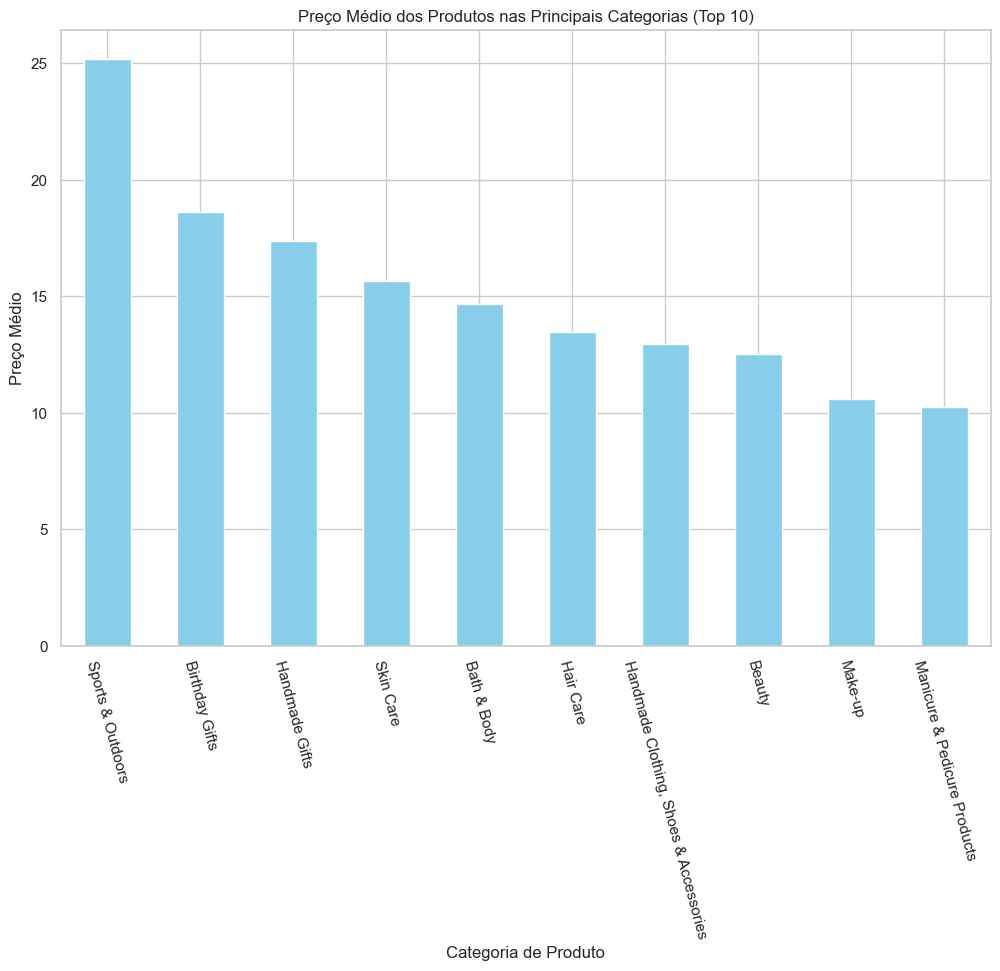

In [87]:
# Criar a figura
plt.figure(figsize=(12, 8))

# Criar o gráfico de barras
average_prices.plot(kind='bar', color='skyblue')

# Adicionar título e rótulos aos eixos
plt.title('Preço Médio dos Produtos nas Principais Categorias (Top 10)')
plt.xlabel('Categoria de Produto')
plt.ylabel('Preço Médio')
plt.xticks(rotation=-75)

# Mostrar o gráfico
plt.show()


Box Plots:
Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

**'Computer Memory' : 4.70.**

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2115963 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 147.3+ MB


In [107]:
star_ss = df_top_10['stars']
outliers_df_stars = rm_outliers(star_ss)
# df = df.drop(outliers_df_stars.index)
outliers_df_stars

df_top_10['stars'].value_counts()

stars
0.0    607423
5.0     37725
4.5     28608
4.4     26069
4.6     24009
4.3     22000
4.2     17903
4.7     16289
4.0     15898
4.1     13360
3.9      7729
4.8      7412
3.8      5910
3.7      4663
3.0      3822
3.6      3719
3.5      3460
1.0      2492
3.4      2388
4.9      2058
3.3      1973
3.2      1373
2.0      1208
3.1      1169
2.9       761
2.8       575
2.5       526
2.7       494
2.6       371
2.4       271
2.3       167
2.2       141
2.1       131
1.5       109
1.9        64
1.8        56
1.4        47
1.7        41
1.6        30
1.3        17
1.2         3
1.1         1
Name: count, dtype: int64

In [97]:
average_rating = df_top_10.groupby('category')['stars'].median().sort_values(ascending=False)

mean_stars = df.groupby('category')['stars'].median()

highest_stars_category = mean_stars.idxmax()
highest_stars_price = mean_stars.max()

print(f"A categoria de produto com a maior mediana em estrelas  é '{highest_stars_category}' com uma mediana de {highest_stars_price:.2f}.")

A categoria de produto com a maior mediana em estrelas  é 'Computer Memory' com uma mediana de 4.70.


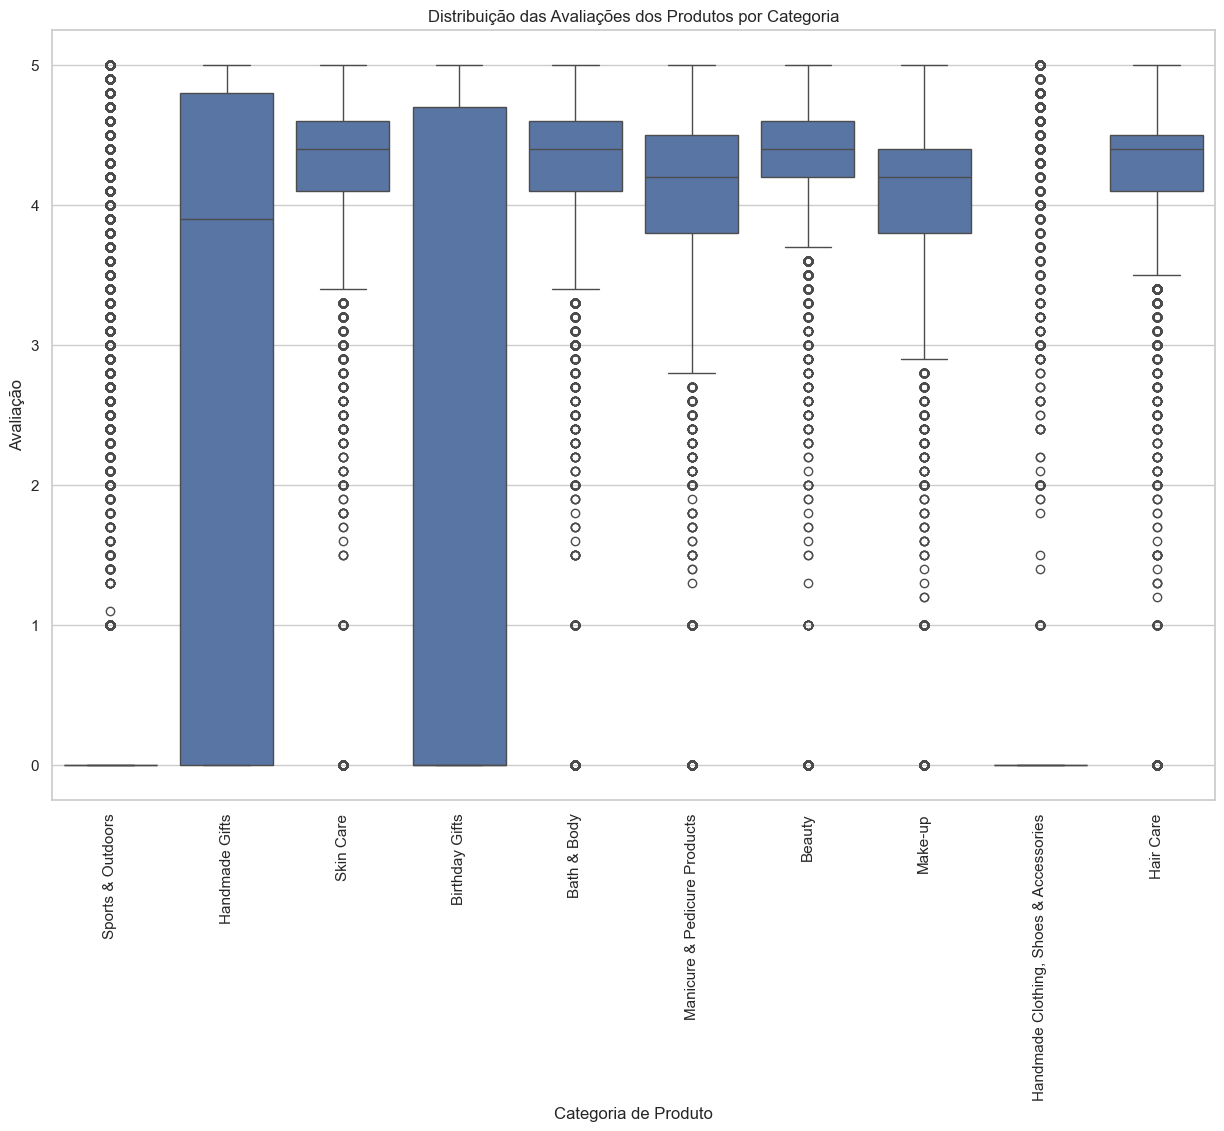

In [102]:
# Configurar o estilo do Seaborn
sns.set_theme(style="whitegrid")

# Criar a figura
plt.figure(figsize=(15, 10))

# Criar o box plot
sns.boxplot(x='category', y='stars', data=df_top_10)

# Adicionar título e rótulos aos eixos
plt.title('Distribuição das Avaliações dos Produtos por Categoria')
plt.xlabel('Categoria de Produto')
plt.ylabel('Avaliação')
plt.xticks(rotation=90)

# Mostrar o gráfico
plt.show()


Part 3: Investigating the Interplay Between Product Prices and Ratings
Objective: Analyze how product ratings (stars) correlate with product prices.

Correlation Coefficients:

Calculate the correlation coefficient between price and stars.
Is there a significant correlation between product price and its rating?

**according to the results there is no correlatiion**


In [109]:
# Calcular o coeficiente de correlação
correlation = df['price'].corr(df['stars'])
correlationsm = df['price'].corr(df['stars'],  method='spearman')

print(f"O coeficiente de correlação entre preço e avaliação é {correlation:.2f}")
print(f"O coeficiente de correlação entre preço e avaliação é {correlationsm:.2f}")


O coeficiente de correlação entre preço e avaliação é -0.08
O coeficiente de correlação entre preço e avaliação é -0.07



Visualizations:

Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?


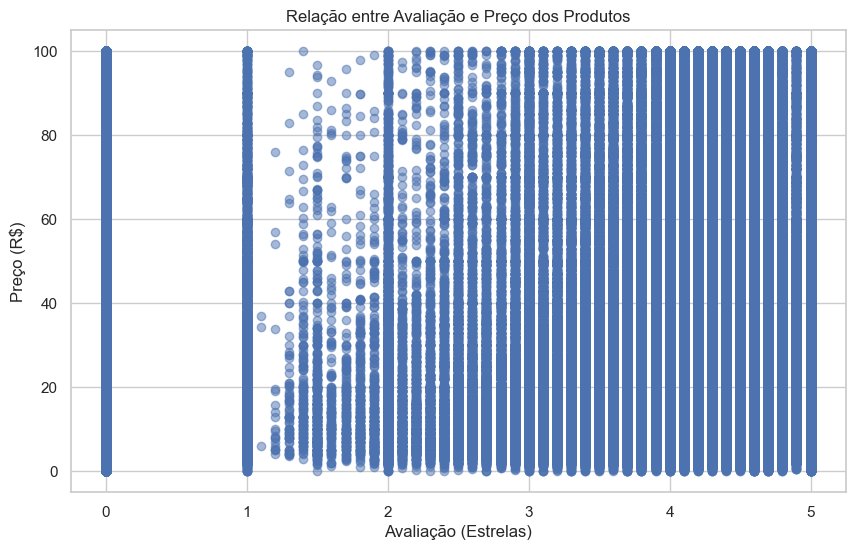

In [112]:
# Criar a figura
plt.figure(figsize=(10, 6))

# Criar o scatter plot
plt.scatter(df['stars'], df['price'], alpha=0.5)

# Adicionar título e rótulos aos eixos
plt.title('Relação entre Avaliação e Preço dos Produtos')
plt.xlabel('Avaliação (Estrelas)')
plt.ylabel('Preço (R$)')
plt.grid(True)

# Mostrar o gráfico
plt.show()



Use a correlation heatmap to visualize correlations between all numerical variables.
Examine if product prices typically follow a normal distribution using a QQ plot.

In [116]:
# Separating between discrete and continuous variables, as discrete ones could potentially be treated as categorical.
# Remember to adjust the threshold (in this case, < 20) based on your dataset's specific characteristics and domain knowledge.
potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 43]
potential_categorical_from_numerical

# Extracting columns with object (typically string) data types to create a categorical dataframe
# For demonstration purposes, let's consider the columns in potential_categorical_from_numerical as categorical variables.
df_categorical = pd.concat([df.select_dtypes("object"), potential_categorical_from_numerical], axis=1)

# Adjusting the numerical dataframe by removing the moved columns
df_numerical = df.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)
df_numerical.drop(columns='uid')


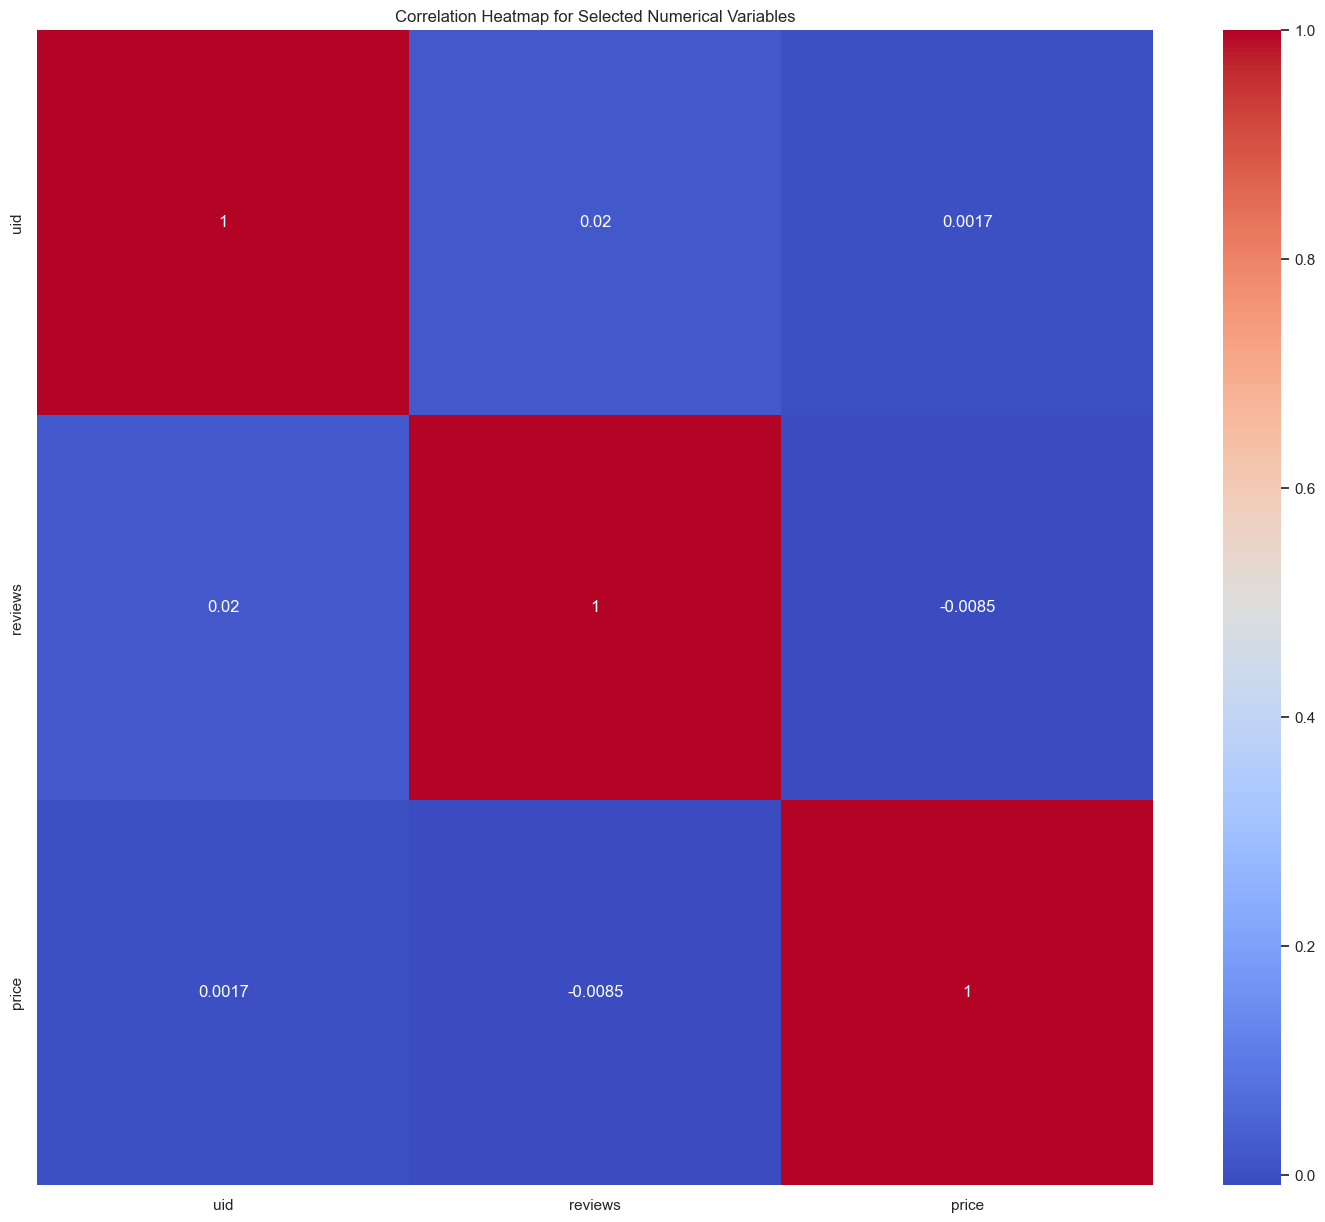

In [122]:
correlation_matrix = df_numerical.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

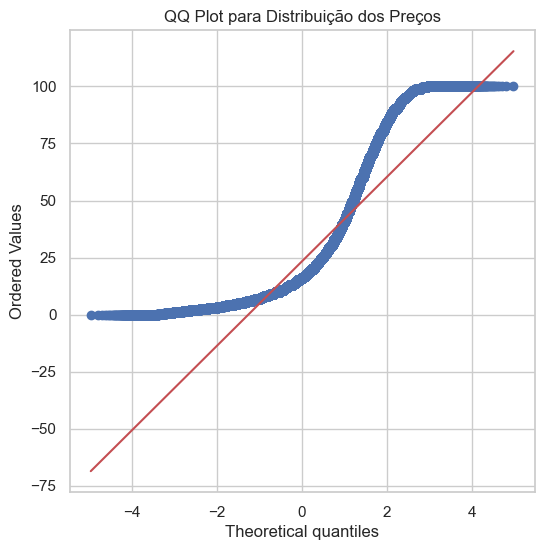

In [123]:
plt.figure(figsize=(6, 6))
stats.probplot(df['price'], dist="norm", plot=plt)
plt.title('QQ Plot para Distribuição dos Preços')
plt.show()